# NSW Air Quality Monthly Averages 2000-2024 - Processing

## Dependencies

Ensure that the required libraries have been installed locally as per the README.md file included in this project.

Run the following cell the import the required dependencies for this notebook.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

## Load Datasets

In [2]:
# Load data
df_air_quality = pd.read_excel('raw-combined.xlsx')            # Load raw Air Quality data.
df_geography = pd.read_csv('../geography/processed.csv')       # Load mapping of Air Quality Research Sites to Local Health Districts

## Exploratory Data Analysis

Exploratory data analysis of Geographic data.

In [3]:
# Generate summary statistics for object columns.
object_summary_stats = df_geography.describe(include=['O']).transpose()                                             # Generate summary statistics for object columns.
object_summary_stats['missing_values'] = df_geography.isnull().sum()                                                # Add missing values to the summary table.
object_summary_stats['present_values'] = df_geography.notnull().sum()                                               # Add present values to the summary table.
object_summary_stats['datatype'] = df_geography.dtypes                                                              # Add data types to the summary table.
object_summary_stats = object_summary_stats[['datatype', 'present_values', 'missing_values', 'unique']]             # Select features and reorder table.

# Display the summary tables with titles.
print("Dataset Head:")                                                                                              # Display the dataset head title.
display(df_geography.head().style.set_table_styles([{'selector': 'th', 'props': [('min-width', '100px')]}]))        # Display the dataset head. For better visualization, set the minimum width of the table headers to 100px.

print("\nObject Summary Statistics:")                                                                               # Display the object summary statistics.
display(object_summary_stats.style.set_table_styles([{'selector': 'th', 'props': [('min-width', '100px')]}]))       # Display the object summary statistics. For better visualization, set the minimum width of the table headers to 100px.

Dataset Head:


,suburb,lhd
0,Albion Park South,Murrumbidgee
1,Alexandria,Sydney
2,Bargo,South Western Sydney
3,Bathurst,Western NSW
4,Beresfield,Hunter New England



Object Summary Statistics:


,datatype,present_values,missing_values,unique
suburb,object,49,0,49
lhd,object,49,0,13


Exploratory data analysis of Air Quality data.

In [4]:
# Display the summary statistics of the air quality dataset.
df_air_quality.info()

# Display head.
print("Dataset Head:")             
display(df_air_quality.head())         

# Display tail.
print("Dataset Tail:")             
display(df_air_quality.tail())  

# Display summary statistics.
print("Dataset Summary Statistics:")
display(df_air_quality.describe([x*0.1 for x in range(10)]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Columns: 256 entries, Date to VINEYARD PM10 monthly average [µg/m³]
dtypes: float64(255), object(1)
memory usage: 590.1+ KB
Dataset Head:


,Date,RANDWICK SO2 monthly average [pphm],ROZELLE SO2 monthly average [pphm],LINDFIELD SO2 monthly average [pphm],LIVERPOOL SO2 monthly average [pphm],BRINGELLY SO2 monthly average [pphm],CHULLORA SO2 monthly average [pphm],WYONG SO2 monthly average [pphm],WALLSEND SO2 monthly average [pphm],CARRINGTON SO2 monthly average [pphm],...,BERESFIELD PM10 monthly average [µg/m³],TAMWORTH PM10 monthly average [µg/m³],WOLLONGONG PM10 monthly average [µg/m³],KEMBLA GRANGE PM10 monthly average [µg/m³],RICHMOND PM10 monthly average [µg/m³],BARGO PM10 monthly average [µg/m³],ALBURY PM10 monthly average [µg/m³],WAGGA WAGGA PM10 monthly average [µg/m³],ST MARYS PM10 monthly average [µg/m³],VINEYARD PM10 monthly average [µg/m³]
0,31/01/2000,0.1,NaN,0.1,NaN,0.0,NaN,NaN,0.2,NaN,...,16.8,NaN,18.3,NaN,15.3,NaN,NaN,NaN,16.9,15.5
1,29/02/2000,0.1,NaN,0.1,NaN,0.1,NaN,NaN,0.2,NaN,...,20.3,NaN,27.8,NaN,21.2,NaN,NaN,NaN,21.5,18.5
2,31/03/2000,NaN,NaN,0.1,NaN,0.0,NaN,NaN,0.2,NaN,...,17.9,NaN,21.8,NaN,15.0,NaN,NaN,NaN,15.7,14.5
3,30/04/2000,NaN,NaN,0.1,NaN,0.0,NaN,NaN,0.2,NaN,...,15.8,NaN,14.9,NaN,13.6,NaN,NaN,NaN,13.2,15.4
4,31/05/2000,NaN,NaN,0.1,NaN,0.0,NaN,NaN,0.2,NaN,...,16.9,NaN,15.7,NaN,11.4,NaN,NaN,NaN,11.6,13.7


Dataset Tail:


,Date,RANDWICK SO2 monthly average [pphm],ROZELLE SO2 monthly average [pphm],LINDFIELD SO2 monthly average [pphm],LIVERPOOL SO2 monthly average [pphm],BRINGELLY SO2 monthly average [pphm],CHULLORA SO2 monthly average [pphm],WYONG SO2 monthly average [pphm],WALLSEND SO2 monthly average [pphm],CARRINGTON SO2 monthly average [pphm],...,BERESFIELD PM10 monthly average [µg/m³],TAMWORTH PM10 monthly average [µg/m³],WOLLONGONG PM10 monthly average [µg/m³],KEMBLA GRANGE PM10 monthly average [µg/m³],RICHMOND PM10 monthly average [µg/m³],BARGO PM10 monthly average [µg/m³],ALBURY PM10 monthly average [µg/m³],WAGGA WAGGA PM10 monthly average [µg/m³],ST MARYS PM10 monthly average [µg/m³],VINEYARD PM10 monthly average [µg/m³]
290,30/04/2024,0.1,0.1,NaN,0.1,0.0,NaN,0.0,0.2,0.2,...,15.5,12.1,15.8,21.8,13.6,14.1,23.5,NaN,15.6,NaN
291,31/05/2024,0.1,0.1,NaN,0.1,0.0,NaN,0.0,0.2,0.2,...,14.8,13.0,12.9,16.5,11.3,10.7,24.2,NaN,11.7,NaN
292,30/06/2024,0.1,0.0,NaN,0.1,0.0,NaN,0.0,0.2,0.3,...,12.8,12.3,9.5,11.4,9.2,8.6,11.7,NaN,10.3,NaN
293,31/07/2024,0.1,0.0,NaN,0.0,0.0,NaN,0.0,0.2,0.2,...,13.1,10.5,9.7,14.5,8.6,7.9,10.5,NaN,10.9,NaN
294,31/08/2024,0.1,0.1,NaN,0.1,0.0,NaN,0.1,0.1,0.2,...,16.2,13.8,14.8,22.6,13.1,13.8,13.3,NaN,13.2,NaN


Dataset Summary Statistics:


,RANDWICK SO2 monthly average [pphm],ROZELLE SO2 monthly average [pphm],LINDFIELD SO2 monthly average [pphm],LIVERPOOL SO2 monthly average [pphm],BRINGELLY SO2 monthly average [pphm],CHULLORA SO2 monthly average [pphm],WYONG SO2 monthly average [pphm],WALLSEND SO2 monthly average [pphm],CARRINGTON SO2 monthly average [pphm],STOCKTON SO2 monthly average [pphm],...,BERESFIELD PM10 monthly average [µg/m³],TAMWORTH PM10 monthly average [µg/m³],WOLLONGONG PM10 monthly average [µg/m³],KEMBLA GRANGE PM10 monthly average [µg/m³],RICHMOND PM10 monthly average [µg/m³],BARGO PM10 monthly average [µg/m³],ALBURY PM10 monthly average [µg/m³],WAGGA WAGGA PM10 monthly average [µg/m³],ST MARYS PM10 monthly average [µg/m³],VINEYARD PM10 monthly average [µg/m³]
count,280.000000,107.000000,191.000000,96.000000,283.000000,204.000000,140.00000,274.000000,121.000000,116.000000,...,283.000000,265.000000,290.000000,241.000000,291.000000,176.000000,259.000000,111.000000,283.000000,195.000000
mean,0.103571,0.061682,0.073298,0.076042,0.013074,0.079412,0.07000,0.135766,0.171074,0.233621,...,19.984099,16.843396,18.471379,19.507469,16.253608,14.519886,17.348649,24.180180,17.055477,17.031795
std,0.052753,0.048845,0.062988,0.042907,0.039573,0.045134,0.04599,0.065451,0.076853,0.175917,...,6.711216,8.748522,6.310110,6.080579,7.072400,6.281183,10.217800,10.507459,6.780144,6.111997
min,-0.100000,0.000000,-0.100000,0.000000,-0.100000,0.000000,0.00000,0.000000,0.000000,0.000000,...,11.900000,9.100000,8.700000,9.900000,5.500000,7.200000,8.000000,10.700000,7.800000,10.600000
0%,-0.100000,0.000000,-0.100000,0.000000,-0.100000,0.000000,0.00000,0.000000,0.000000,0.000000,...,11.900000,9.100000,8.700000,9.900000,5.500000,7.200000,8.000000,10.700000,7.800000,10.600000
10%,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.100000,0.100000,0.100000,...,15.100000,11.200000,11.300000,13.200000,10.500000,9.250000,10.500000,14.700000,11.040000,12.400000
20%,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.100000,0.100000,0.100000,...,15.900000,12.180000,12.840000,14.600000,12.100000,10.000000,11.500000,15.500000,12.600000,13.680000
30%,0.100000,0.000000,0.100000,0.100000,0.000000,0.100000,0.07000,0.100000,0.100000,0.100000,...,16.900000,13.200000,14.570000,16.400000,13.100000,11.450000,12.600000,17.000000,13.860000,14.400000
40%,0.100000,0.100000,0.100000,0.100000,0.000000,0.100000,0.10000,0.100000,0.200000,0.100000,...,17.800000,13.900000,16.260000,18.200000,13.900000,12.500000,13.500000,18.900000,14.900000,15.060000
50%,0.100000,0.100000,0.100000,0.100000,0.000000,0.100000,0.10000,0.100000,0.200000,0.200000,...,19.000000,15.100000,17.900000,19.200000,15.000000,13.400000,14.500000,20.800000,16.000000,16.100000


## Drop Irrelevant Data

Drop columns where the Air Quality Research Site could not be mapped to a Local Health District.

In [5]:
# Drop irrelevant columns from the Air Quality data.
initial_columns = df_air_quality.shape[1]                                                                                                               # Track the number of columns before dropping.
df_air_quality = df_air_quality.drop(columns=[col for col in df_air_quality.columns if 'LIVERPOOL SWAQS' in col or 'RRPOD2' in col])                    # Drop columns with unverified location data.
df_air_quality = df_air_quality.drop(columns=[col for col in df_air_quality.columns if 'ALBURY' in col])                                                # Drop columns with Albury Data (Part of a joint LHD with Victoria, outside of scope)
final_columns = df_air_quality.shape[1]                                                                                                                 # Track the number of columns after dropping.
columns_dropped = initial_columns - final_columns                                                                                                       # Calculate the number of columns dropped.

# Print the number of columns dropped.
print(f"Number of columns dropped: {columns_dropped}")                                                                                                  # Print the number of columns dropped.  

Number of columns dropped: 9


## Handle Missing Values 

Drop columns with no data.

In [6]:
# Drop columns which don't contain any data.
initial_columns = df_air_quality.shape[1]                                                                                                              # Track the number of columns before dropping.
df_air_quality = df_air_quality.dropna(axis=1, how='all')                                                                                              # Drop columns where all elements are missing.
final_columns = df_air_quality.shape[1]                                                                                                                # Track the number of columns after dropping.
columns_dropped = initial_columns - final_columns                                                                                                      # Calculate the number of columns dropped.

# Print the number of columns dropped.
print(f"Number of columns dropped: {columns_dropped}")                                                                                                 # Print the number of columns dropped.

Number of columns dropped: 18


Fill missing values using Baysian Ridge Regression model imputation.

Note: This stage may take a couple minutes to complete due to the size of the dataset.

In [7]:
# Create an imputer object with polynomial regression model
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=20, random_state=0)                                                                     # Create an imputer object with Bayesian Ridge regression model
df_air_quality[df_air_quality.columns.difference(['Date'])] = imputer.fit_transform(df_air_quality[df_air_quality.columns.difference(['Date'])])       # Impute missing values in all columns except 'Date'
df_air_quality[df_air_quality.columns.difference(['Date'])] = df_air_quality[df_air_quality.columns.difference(['Date'])].clip(lower=0)                # Ensure all values are non-negative                                                                                                                                # Check first few rows of the data

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Handle Duplicates

Check for duplicated columns and drop if present.

In [8]:
# Drop any duplicate columns.
initial_columns = df_air_quality.shape[1]                                                                                                            # Track the number of columns before dropping.
df_air_quality = df_air_quality.loc[:, ~df_air_quality.columns.duplicated()]                                                                         # Drop columns with duplicate column names.
final_columns = df_air_quality.shape[1]                                                                                                              # Track the number of columns after dropping.
columns_dropped = initial_columns - final_columns                                                                                                    # Calculate the number of columns dropped.

# Print the number of columns dropped.
print(f"Number of columns dropped: {columns_dropped}")                                                                                               # Print the number of columns dropped.

Number of columns dropped: 0


Check for duplicated rows and drop if present.

In [9]:
# Drop any duplicate rows.
initial_rows = df_air_quality.shape[0]                                                                                                               # Track the number of rows before dropping
df_air_quality = df_air_quality.drop_duplicates()                                                                                                    # Drop duplicated rows
final_rows = df_air_quality.shape[0]                                                                                                                 # Track the number of rows after dropping
rows_dropped = initial_rows - final_rows                                                                                                             # Calculate the number of rows dropped

# Print the number of rows dropped.
print(f"Number of rows dropped: {rows_dropped}")                                                                                                     # Print the number of rows dropped

Number of rows dropped: 0


## Handle Outliers

In [12]:
# Calculate ranges for each column (excluding 'Date')
Q1 = df_air_quality.loc[:, df_air_quality.columns != 'Date'].quantile(0.25)                                                                          # Calculate the first quartile
Q3 = df_air_quality.loc[:, df_air_quality.columns != 'Date'].quantile(0.75)                                                                          # Calculate the third quartile
IQR = Q3 - Q1                                                                                                                                        # Calculate the interquartile range
upper_bound = Q3 + 1.5 * IQR                                                                                                                         # Calculate the upper bound
lower_bound = Q1 - 1.5 * IQR                                                                                                                         # Calculate the lower bound

# Identify outliers and set them to the appropriate bound
def replace_outliers(series):
    return np.where(series > upper_bound[series.name], upper_bound[series.name],                                                                     # Replace outliers above the upper bound with the upper bound
                    np.where(series < lower_bound[series.name], lower_bound[series.name], series))                                                   # Replace outliers below the lower bound with the lower bound

# Set outliers to the appropriate bound in the original dataframe
df_air_quality.loc[:, df_air_quality.columns != 'Date'] = df_air_quality.loc[:, df_air_quality.columns != 'Date'].apply(replace_outliers)            # Apply the replace_outliers function to the dataframe                                                                                                                           # Check first few rows of the data                                                               

## Data Normalization

At this stage, the table contains a significant number of columns representing different Air Quality Recording Sites and different Pollutants that are tracked in that column.

The purpose of this next stage is to transform the data so that each row uses the 'date' and 'recording site' as the primary key, and contains a value for each of the 6 pollutants.

In [13]:
# Melt the DataFrame to have 'suburb', 'pollutant', and 'measure' as separate columns
df_melted = df_air_quality.melt(id_vars=['Date'], var_name='variable', value_name='monthly average')                                                # Melt the DataFrame
df_melted[['suburb', 'pollutant', 'measure']] = df_melted['variable'].str.extract(r'((?:\w+\s?){1,3}) (.+?) monthly average \[(.+?)\]')             # Extract 'suburb', 'pollutant', and 'measure' from 'variable'
df_melted = df_melted.drop(columns=['variable'])                                                                                                    # Drop 'variable' column
df_melted = df_melted.rename(columns={'Date': 'date'})                                                                                              # Rename 'Date' to 'date'
df_air_quality = df_melted[['date', 'suburb', 'pollutant', 'measure', 'monthly average']]                                                           # Reassign the melted data to the original DataFrame

# Pivot the DataFrame to have 'pollutant' and 'measure' as MultiIndex columns
pollutant_measure_headers = df_air_quality.pivot_table(index=['date', 'suburb'], columns=['pollutant', 'measure'], values='monthly average')        # Pivot the DataFrame to have 'pollutant' and 'measure' as MultiIndex columns
pollutant_measure_headers.columns = [f'{pollutant} {measure}' for pollutant, measure in pollutant_measure_headers.columns]                          # Rename the columns to have 'pollutant' and 'measure' in the column name
df_air_quality = pollutant_measure_headers.reset_index()                                                                                            # Reset the index of the DataFrame

# Display the restructured DataFrame
display(df_air_quality.head())                                                                                                                      # Check first few rows of the data

,date,suburb,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm
0,28/02/2001,ALBION PARK SOUTH,NaN,0.137529,0.416718,1.644611,NaN,0.134126
1,28/02/2001,ALEXANDRIA,0.0,0.699089,0.790862,1.235663,NaN,0.000000
2,28/02/2001,BARGO,NaN,0.400000,0.500000,1.900000,16.214313,0.000000
3,28/02/2001,BATHURST,NaN,NaN,NaN,1.900000,NaN,NaN
4,28/02/2001,BERESFIELD,NaN,0.600000,0.700000,1.700000,19.200000,0.125513


Add Local Health District data to the table from the geography dataset.

In [14]:
# Prepare string data for merging.
df_air_quality['suburb'] = df_air_quality['suburb'].str.strip()                                                                                    # Remove leading and trailing whitespaces from 'suburb' column in df_air_quality
df_air_quality['suburb'] = df_air_quality['suburb'].str.title()                                                                                    # Capitalize the first letter of each word in 'suburb' column in df_air_quality

# Merge Datasets
df_merged = df_air_quality.merge(df_geography, on='suburb', how='left')                                                                            # Merge df_air_quality and df_geography on 'suburb' column using a left join and store the result in df_air_quality

# Move 'lhd' column to position 3.
lhd_column = df_merged.pop('lhd')                                                                                                                  # Remove 'lhd' column from df_merged and store it in lhd_column
df_merged.insert(2, 'lhd', lhd_column)                                                                                                             # Insert 'lhd' column back into df_merged at position 3

# Display the updated DataFrame
display(df_merged.head())                                                                                                                          # Check the first few rows of the data

,date,suburb,lhd,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm
0,28/02/2001,Albion Park South,Murrumbidgee,NaN,0.137529,0.416718,1.644611,NaN,0.134126
1,28/02/2001,Alexandria,Sydney,0.0,0.699089,0.790862,1.235663,NaN,0.000000
2,28/02/2001,Bargo,South Western Sydney,NaN,0.400000,0.500000,1.900000,16.214313,0.000000
3,28/02/2001,Bathurst,Western NSW,NaN,NaN,NaN,1.900000,NaN,NaN
4,28/02/2001,Beresfield,Hunter New England,NaN,0.600000,0.700000,1.700000,19.200000,0.125513


Aggregate columns based on Local Health District.

In [15]:
# Group by date and lhd and calculate the mean of each pollutant
pollutants = df_merged.columns[3:]                                                                                                                # Get the columns of pollutants in df_merged
df_merged = df_merged.groupby(['date', 'lhd'], as_index=False).agg({col: 'mean' for col in pollutants})                                           # Combine rows where 'date' and 'lhd' match by averaging th pollutant values.

# Display the updated DataFrame
display(df_merged.head())                                                                                                                         # Check the first few rows of the data

,date,lhd,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm
0,28/02/2001,Central Coast,0.143024,0.226347,0.477183,1.686714,17.630047,0.077041
1,28/02/2001,Hunter New England,0.124473,0.282580,0.514558,2.170979,22.770071,0.150604
2,28/02/2001,Illawarra Shoalhaven,0.200000,0.450000,0.750000,1.600000,23.667492,0.100000
3,28/02/2001,Mid North Coast,0.160965,0.158056,0.286426,2.064814,NaN,0.250000
4,28/02/2001,Murrumbidgee,NaN,0.216339,0.331525,1.942691,28.152909,0.134126


Reformat date so make data sortable by month.

In [16]:
# Convert the 'date' column to datetime format
df_merged['date'] = pd.to_datetime(df_merged['date'], format='%d/%m/%Y')                                                                         # Convert the 'date' column in df_merged to datetime format using the format '%d/%m/%Y'
df_merged['date'] = df_merged['date'].dt.to_period('M')                                                                                          # Extract the year and month from the 'date' column and store it back in the 'date' column
df_merged = df_merged.rename(columns={'date': 'year-month'})                                                                                     # Rename the 'date' column to 'year-month'

# Display the updated DataFrame
display(df_merged.head())                                                                                                                        # Check the first few rows of the data

,year-month,lhd,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm
0,2001-02,Central Coast,0.143024,0.226347,0.477183,1.686714,17.630047,0.077041
1,2001-02,Hunter New England,0.124473,0.282580,0.514558,2.170979,22.770071,0.150604
2,2001-02,Illawarra Shoalhaven,0.200000,0.450000,0.750000,1.600000,23.667492,0.100000
3,2001-02,Mid North Coast,0.160965,0.158056,0.286426,2.064814,NaN,0.250000
4,2001-02,Murrumbidgee,NaN,0.216339,0.331525,1.942691,28.152909,0.134126


Sort by date.

In [17]:
# Sort the DataFrame by 'lhd' and 'year-month'
df_merged = df_merged.sort_values(by=['lhd', 'year-month'])                                                                                      # Sort the df_merged DataFrame by 'lhd' and 'year-month' columns

# Display the updated DataFrame
display(df_merged.head())                                                                                                                        # Check the first few rows of the data

,year-month,lhd,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm
1599,2000-01,Central Coast,0.035976,0.222410,0.295551,1.375730,15.313894,0.070126
234,2000-02,Central Coast,0.061917,0.264086,0.365754,1.589020,17.192485,0.085057
1924,2000-03,Central Coast,0.103151,0.318638,0.561762,1.396913,14.787206,0.068360
325,2000-04,Central Coast,0.233901,0.581966,0.857263,1.303383,11.765657,0.044240
2249,2000-05,Central Coast,0.202415,0.716775,0.863470,1.304741,9.342560,0.036394


## Set Time Intervals

Create a new dataset with data aggregated for each financial year.

In [18]:
df_monthly = df_merged.copy()                                                                                                                    # Create a copy of the merged DataFrame for the monthly data
df_financial_year = df_merged.copy()                                                                                                             # Create a copy of the merged DataFrame for the financial year data

Aggregate the monthly data into financial year data.

In [19]:
# Extract year and month from the 'year-month' column
df_financial_year['year'] = df_financial_year['year-month'].dt.year                                                                             # Extract year from 'date'
df_financial_year['month'] = df_financial_year['year-month'].dt.month                                                                           # Extract month from 'date'
df_financial_year.insert(0, 'financial year', None)                                                                                             # Insert a new column called 'financial year'

# Assign financial year based on month
for row in df_financial_year.itertuples():
    if row.month < 7:                                                                                                                           # If the month is less than 7, the financial year is the previous year and the current year
        df_financial_year.loc[row.Index, 'financial year'] = f"{row.year - 1}/{row.year}"
    else:                                                                                                                                       # If the month is greater than or equal to 7, the financial year is the current year and the next year
        df_financial_year.loc[row.Index, 'financial year'] = f"{row.year}/{row.year + 1}"

# Drop date and temporary columns
df_financial_year = df_financial_year.drop(columns=['year-month', 'year', 'month'])                                                             # Drop 'date', 'year', and 'month' columns

# Aggregate the data by financial year and LHD
df_financial_year = df_financial_year.groupby(['financial year', 'lhd']).mean().reset_index()                                                   # Group by 'financial year' and 'lhd' and calculate the mean

# Drop first and last financial years as they are incomplete.
df_financial_year = df_financial_year[~df_financial_year['financial year'].isin(['1999/2000', '2024/2025'])]                                    # Drop first and last financial years

# Sort the data by 'lhd' and 'financial year'
df_financial_year = df_financial_year.sort_values(['lhd', 'financial year']).reset_index(drop=True)                                             # Sort the data by 'lhd' and 'financial year'

# Display the financial year data.
df_financial_year.head()                                                                                                                        # Check first few rows of the data

,financial year,lhd,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm
0,2000/2001,Central Coast,0.162594,0.400140,0.687454,1.688774,13.964746,0.055845
1,2001/2002,Central Coast,0.144535,0.391525,0.650620,1.738042,14.862782,0.058320
2,2002/2003,Central Coast,0.179628,0.353086,0.624368,1.833076,18.799345,0.055758
3,2003/2004,Central Coast,0.203255,0.382494,0.669427,1.815785,16.813619,0.058975
4,2004/2005,Central Coast,0.130793,0.361877,0.591620,1.766424,15.645316,0.060404


## Fill NA Values

Replace any Nan or 0 values with 'NA'

In [20]:
# Replace any NaN values with 'NA' in the both datasets.
df_monthly = df_monthly.fillna('NA')                                                                                                           # Replace any NaN values with 'NA' in Month dataset
df_financial_year = df_financial_year.fillna('NA')                                                                                             # Replace any NaN values with 'NA' in Financial Year dataset

# Replace 0 with 'NA' if all values in the column are 0 for each lhd in monthly dataset.
for lhd in df_monthly['lhd'].unique():                                                                                                         # Loop through each unique 'lhd' value in the 'lhd' column of the monthly dataset
    lhd_data = df_monthly.loc[df_monthly['lhd'] == lhd]                                                                                        # Get the data for the current 'lhd' value
    zero_columns = lhd_data.columns[(lhd_data == 0).all()].tolist()                                                                            # Get the columns where all values are 0
    df_monthly.loc[df_monthly['lhd'] == lhd, zero_columns] = 'NA'                                                                              # Replace 0 with 'NA' in the selected columns for the current 'lhd'

# Replace 0 with 'NA' if all values in the column are 0 for each lhd in financial year dataset.
for lhd in df_financial_year['lhd'].unique():                                                                                                  # Loop through each unique 'lhd' value in the 'lhd' column of the financial year dataset
    lhd_data = df_financial_year.loc[df_financial_year['lhd'] == lhd]                                                                          # Get the data for the current 'lhd' value
    zero_columns = lhd_data.columns[(lhd_data == 0).all()].tolist()                                                                            # Get the columns where all values are 0
    df_financial_year.loc[df_financial_year['lhd'] == lhd, zero_columns] = 'NA'                                                                # Replace 0 with 'NA' in the selected columns for the current 'lhd'

## Output Processed Dataset

In [21]:
# Save the processed data
df_monthly.to_csv('processed-monthly.csv', index=False)                                                                                       # Save the processed monthly data to a CSV file
df_financial_year.to_csv('processed-financial-year.csv', index=False)                                                                         # Save the processed financial year data to a CSV file

## View Processed Dataset (Monthly)

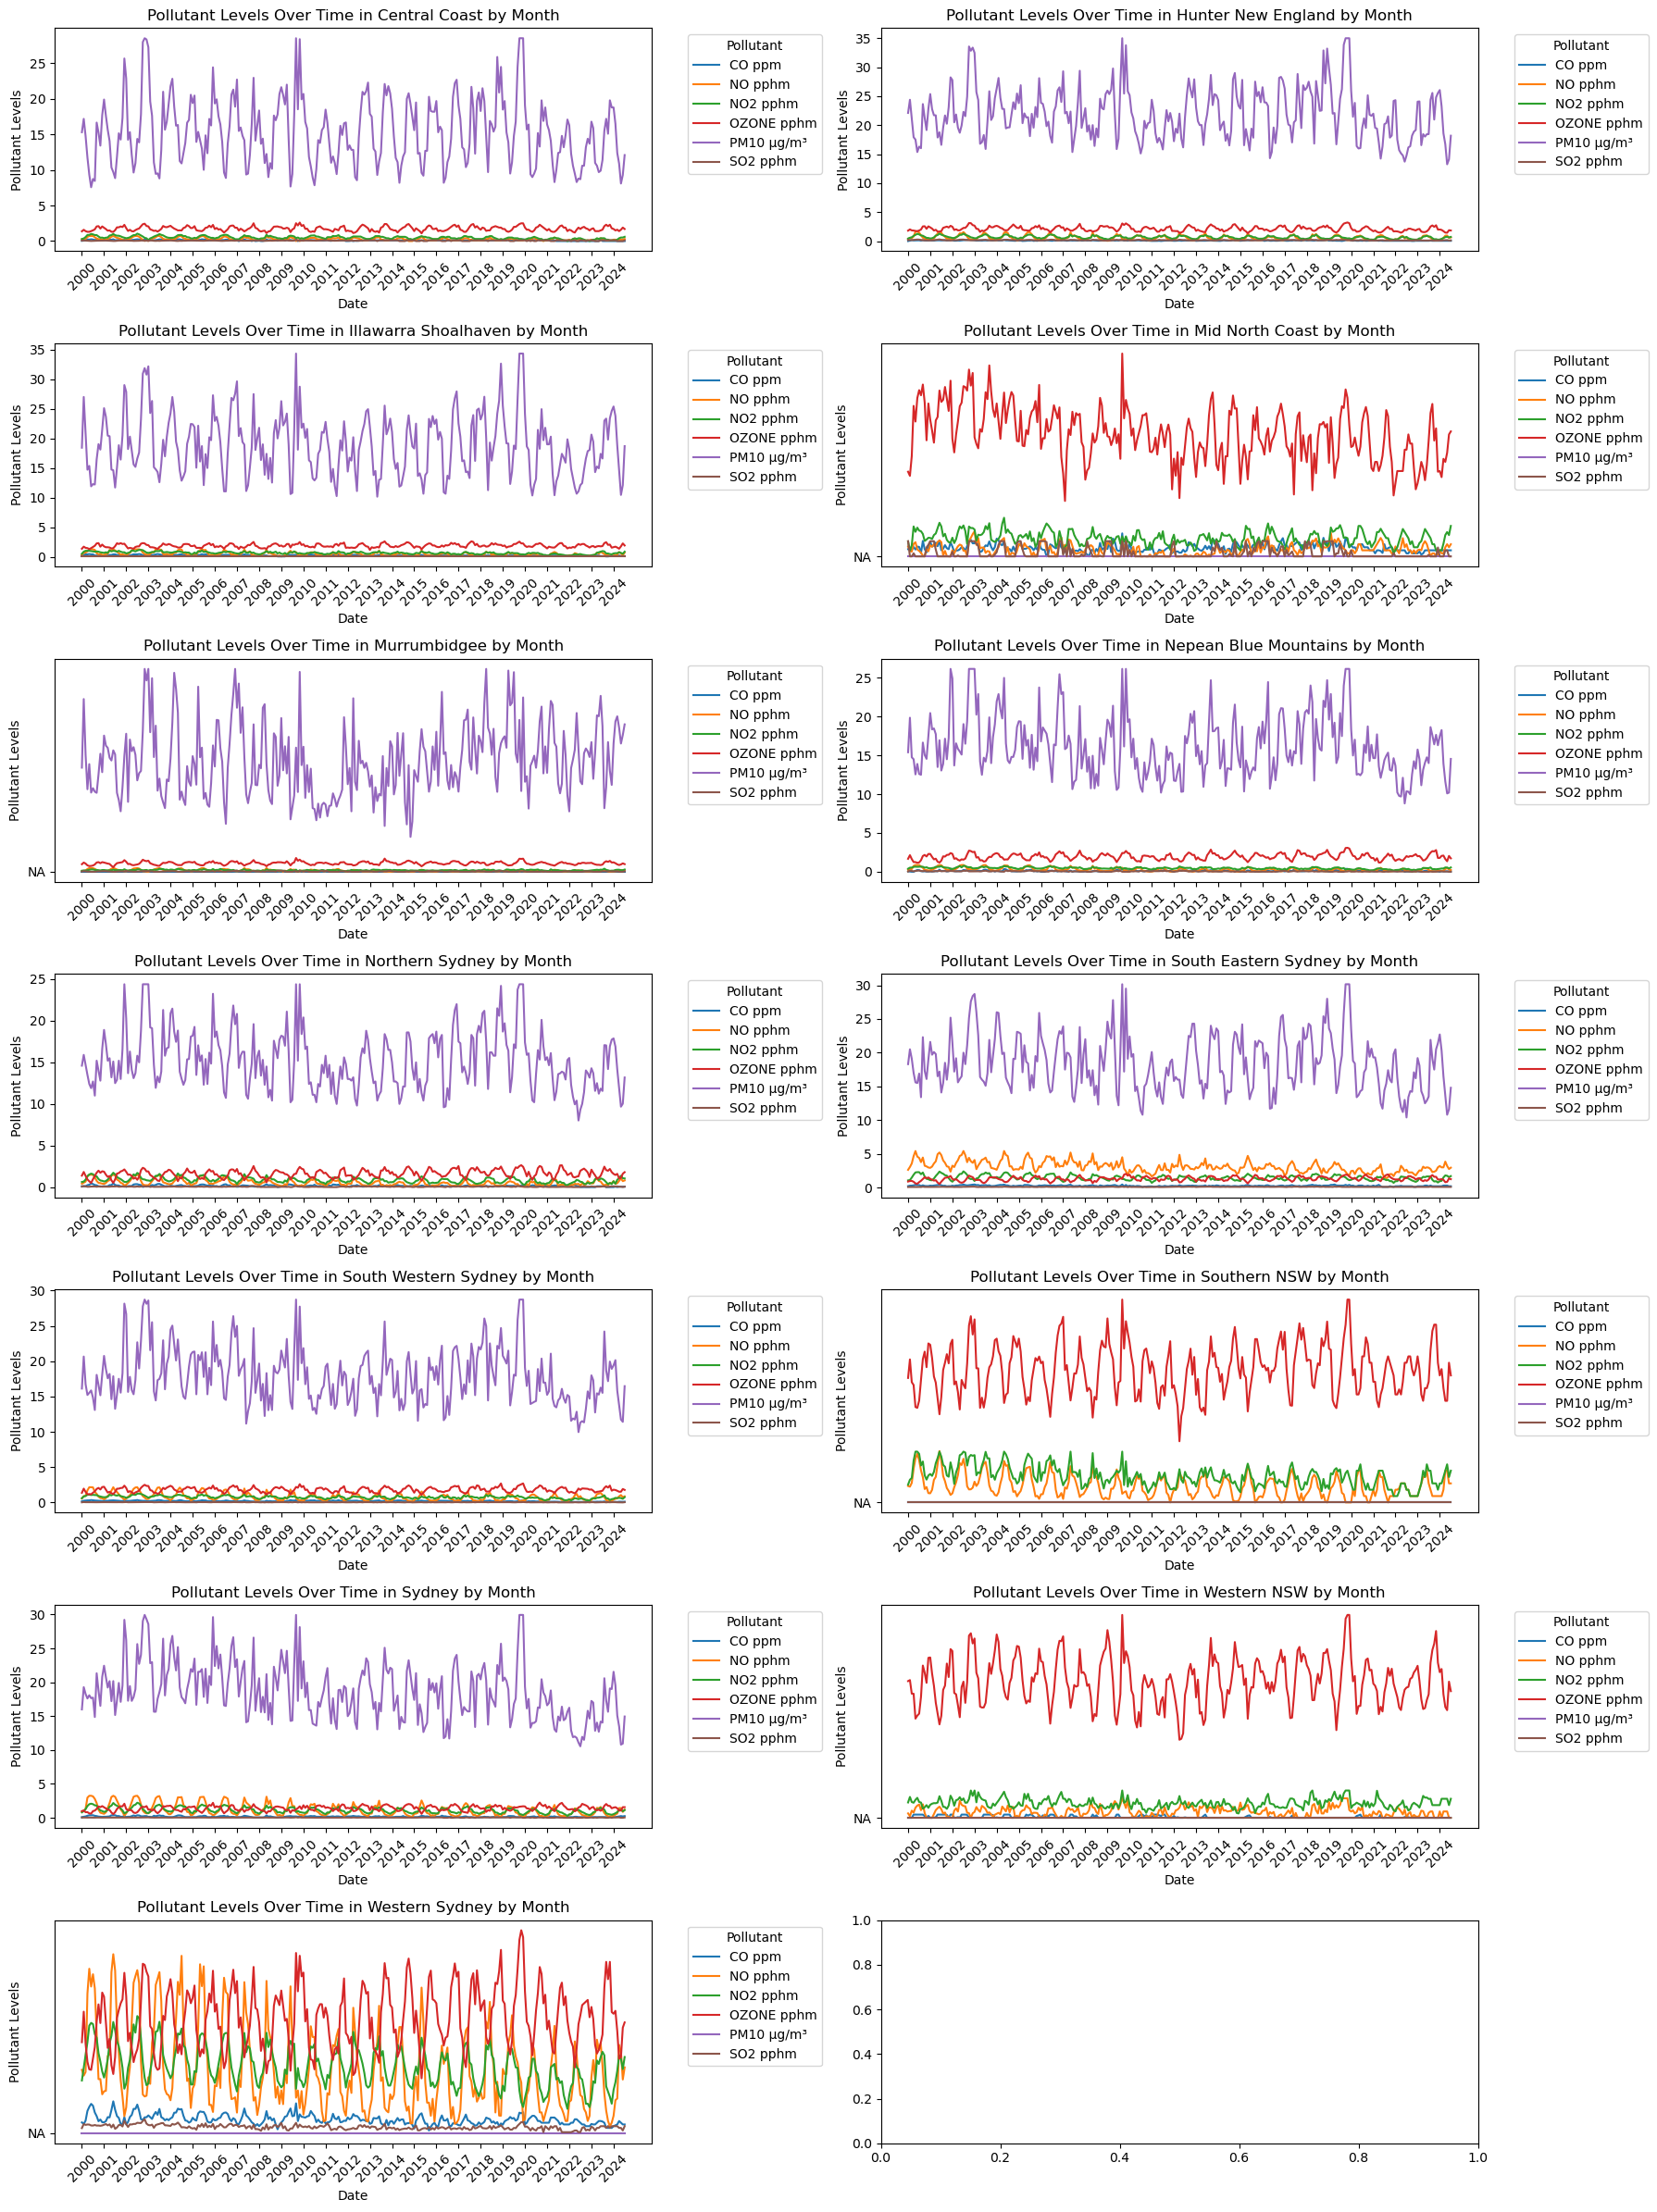

In [22]:
# Set the figure size
fig, axes = plt.subplots(7, 2, figsize=(18, 24))                                                                                              # Set the figure size

# List of pollutants to plot
pollutants = ['CO ppm', 'NO pphm', 'NO2 pphm', 'OZONE pphm', 'PM10 µg/m³', 'SO2 pphm']                                                        # List of pollutants to plot

# Flatten the axes array for easy iteration
axes = axes.flatten()                                                                                                                         # Flatten the axes array

# Plot each LHD
for i, lhd in enumerate(df_monthly['lhd'].unique()):                                                                                          # Iterate through each LHD

    # Check if the index exceeds the number of axes
    if i >= len(axes):                                                                                                                        # If the index exceeds the number of axes, break
        break
    ax = axes[i]                                                                                                                              # Get the axis
    subset = df_monthly[df_monthly['lhd'] == lhd]                                                                                             # Get the subset of data for the LHD
    for pollutant in pollutants:                                                                                                              # Iterate through each pollutant
        ax.plot(subset['year-month'].astype(str), subset[pollutant], label=pollutant)                                                         # Plot the pollutant levels over time
    
    # Set the title, labels, and legend
    ax.set_title(f'Pollutant Levels Over Time in {lhd} by Month')                                                                              # Set the title
    ax.set_xlabel('Date')                                                                                                                      # Set the x-axis label 
    ax.set_xticks(ticks=range(0, len(subset['year-month']), 12))                                                                               # Set the x-ticks to be every 12 months
    ax.set_xticklabels(subset['year-month'].dt.year[::12], rotation=45)                                                                        # Set the x-tick labels to be the year
    ax.set_ylabel('Pollutant Levels')                                                                                                          # Set the y-axis label
    ax.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')                                                                   # Set the legend
    ax.tick_params(axis='x', rotation=45)                                                                                                      # Rotate the x-ticks for better readability

# Dislpay the plot
plt.tight_layout()                                                                                                                             # Adjust the subplot layout
plt.show()                                                                                                                                     # Display the plot

## View Processed Data (Financial Year)

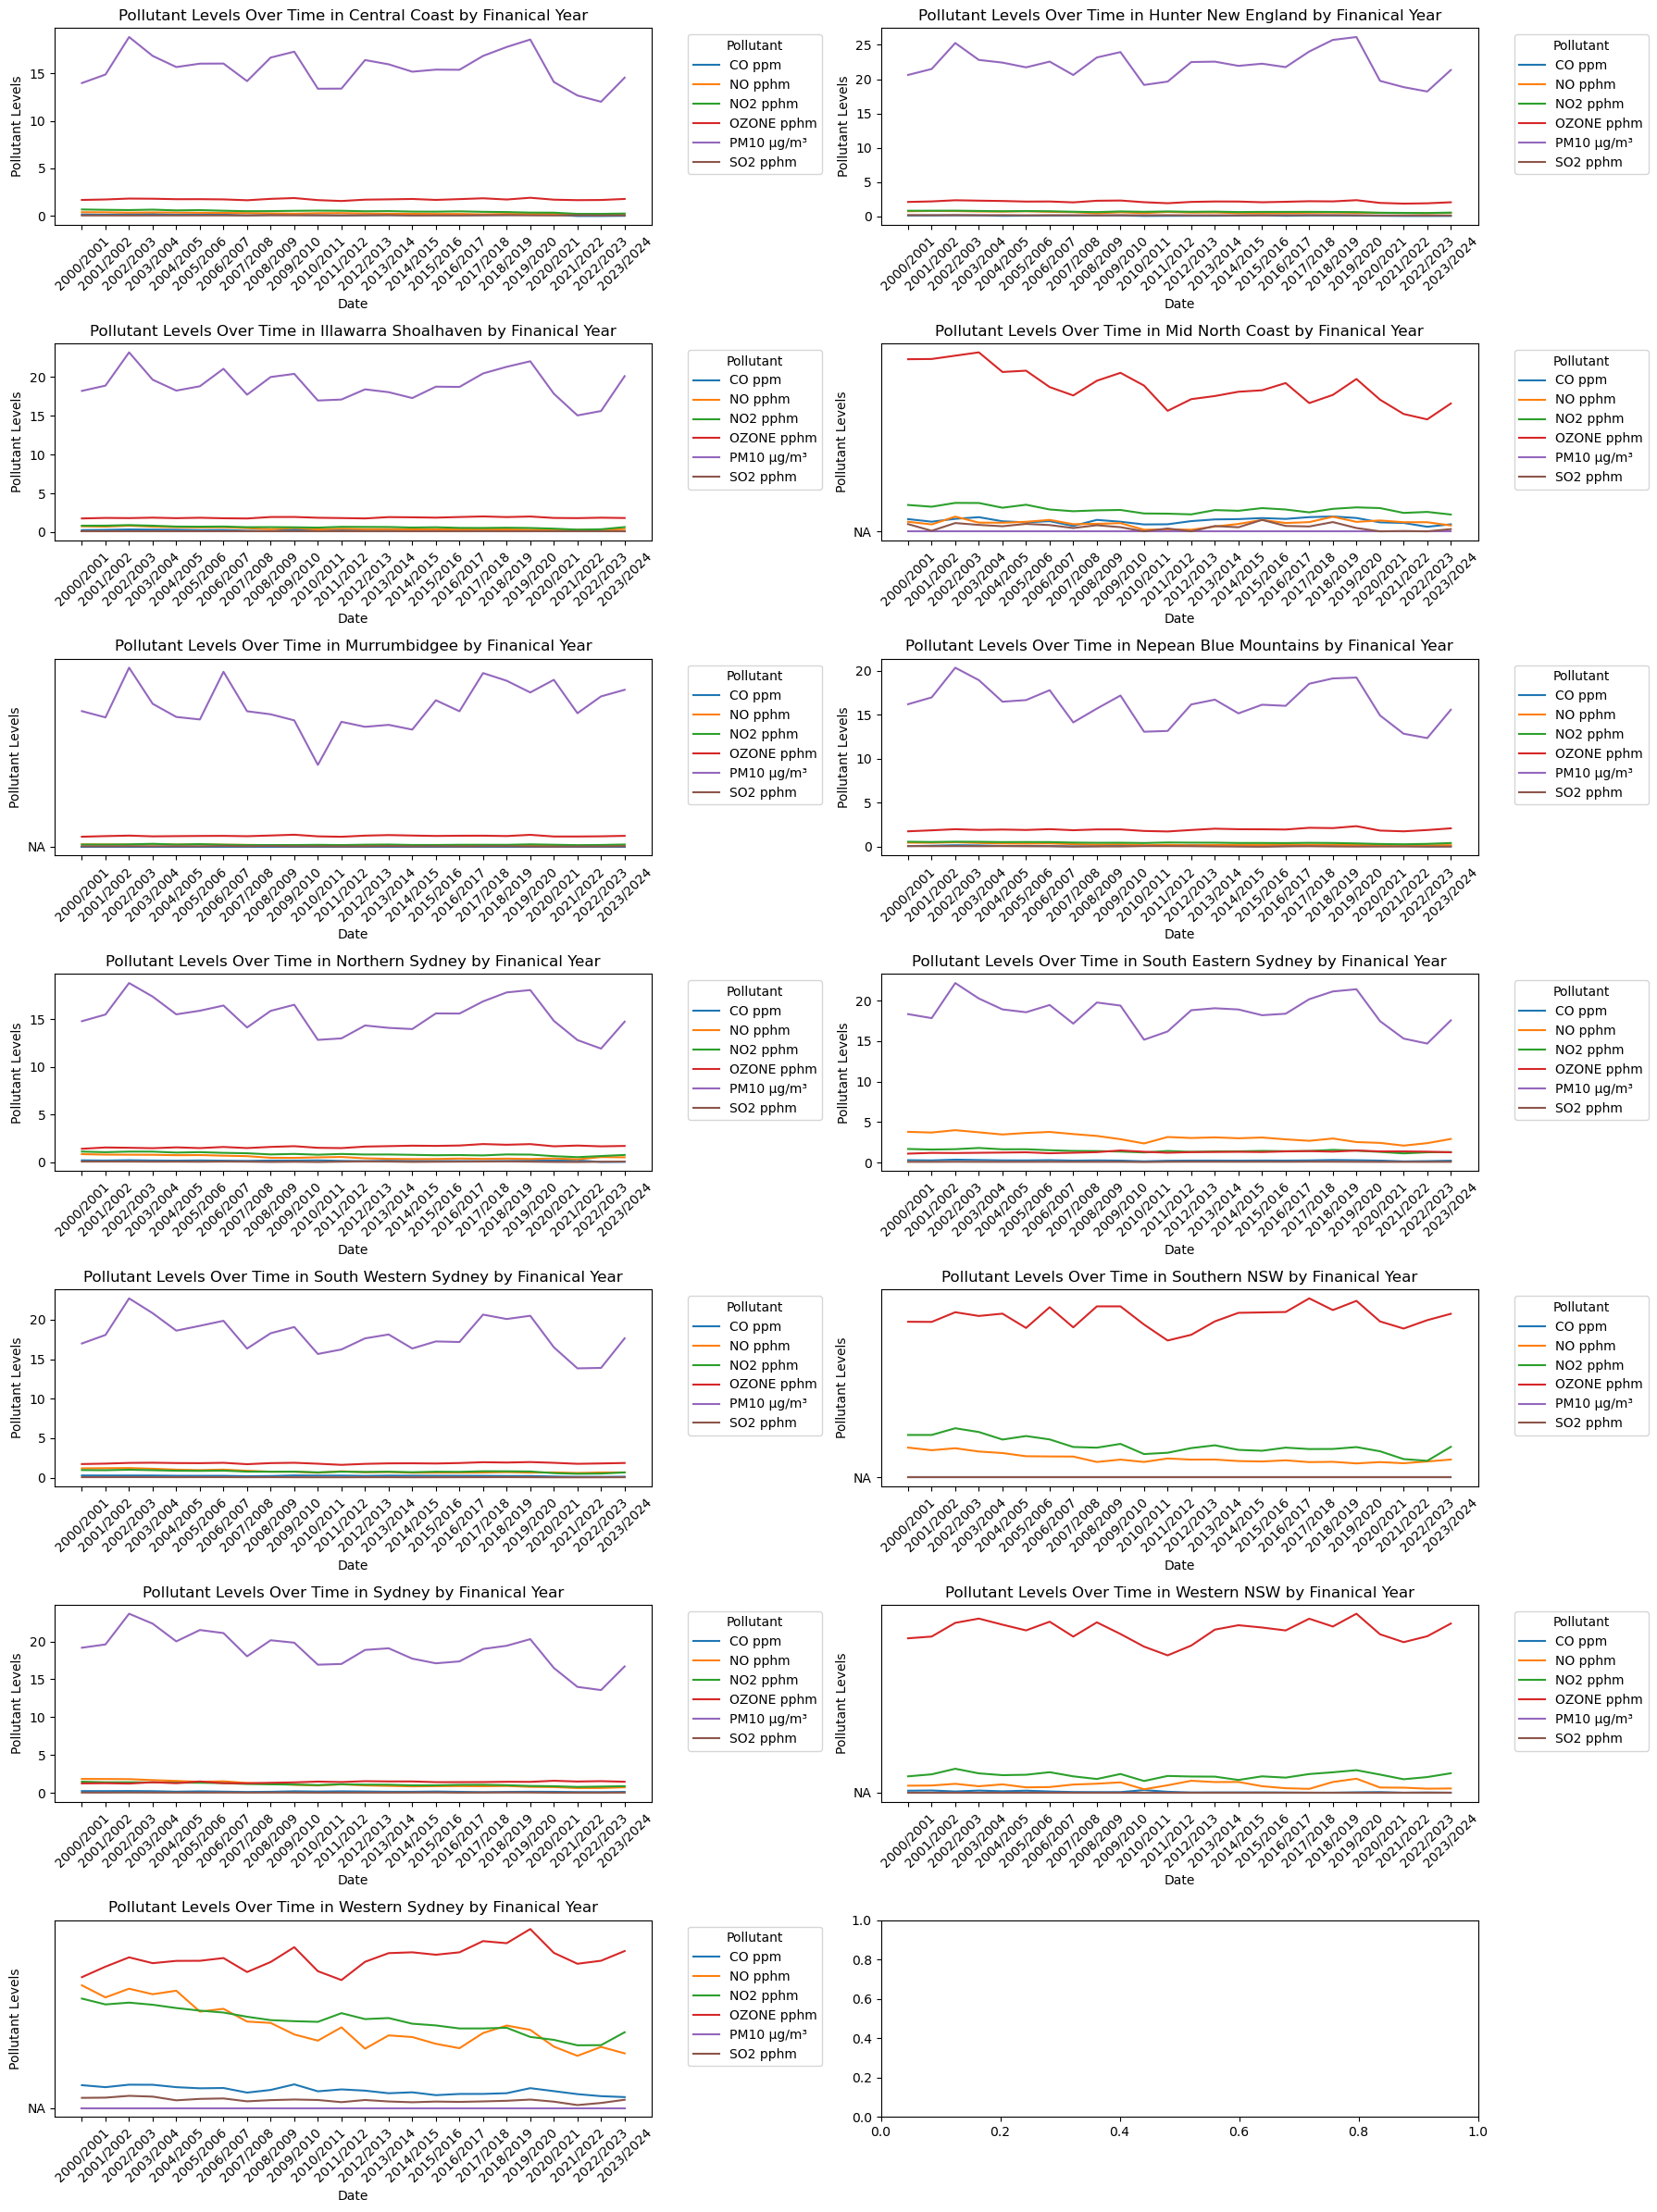

In [23]:
# Set the figure size
fig, axes = plt.subplots(7, 2, figsize=(18, 24))                                                                                              # Set the figure size

# List of pollutants to plot
pollutants = ['CO ppm', 'NO pphm', 'NO2 pphm', 'OZONE pphm', 'PM10 µg/m³', 'SO2 pphm']                                                        # List of pollutants to plot

# Flatten the axes array for easy iteration
axes = axes.flatten()                                                                                                                         # Flatten the axes array

# Plot each LHD
for i, lhd in enumerate(df_financial_year['lhd'].unique()):                                                                                   # Iterate through each LHD

    # Check if the index exceeds the number of axes
    if i >= len(axes):                                                                                                                        # If the index exceeds the number of axes, break
        break
    ax = axes[i]                                                                                                                              # Get the axis
    subset = df_financial_year[df_financial_year['lhd'] == lhd]                                                                               # Get the subset of data for the LHD
    for pollutant in pollutants:                                                                                                              # Iterate through each pollutant
        ax.plot(subset['financial year'].astype(str), subset[pollutant], label=pollutant)                                                     # Plot the pollutant levels over time
    
    # Set the title, labels, and legend
    ax.set_title(f'Pollutant Levels Over Time in {lhd} by Finanical Year')                                                                     # Set the title
    ax.set_xlabel('Date')                                                                                                                      # Set the x-axis label 
    ax.set_ylabel('Pollutant Levels')                                                                                                          # Set the y-axis label
    ax.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')                                                                   # Set the legend
    ax.tick_params(axis='x', rotation=45)                                                                                                      # Rotate the x-ticks for better readability

# Dislpay the plot
plt.tight_layout()                                                                                                                             # Adjust the subplot layout
plt.show()                                                                                                                                     # Display the plot